Kluibert Berly Alarcon Cori

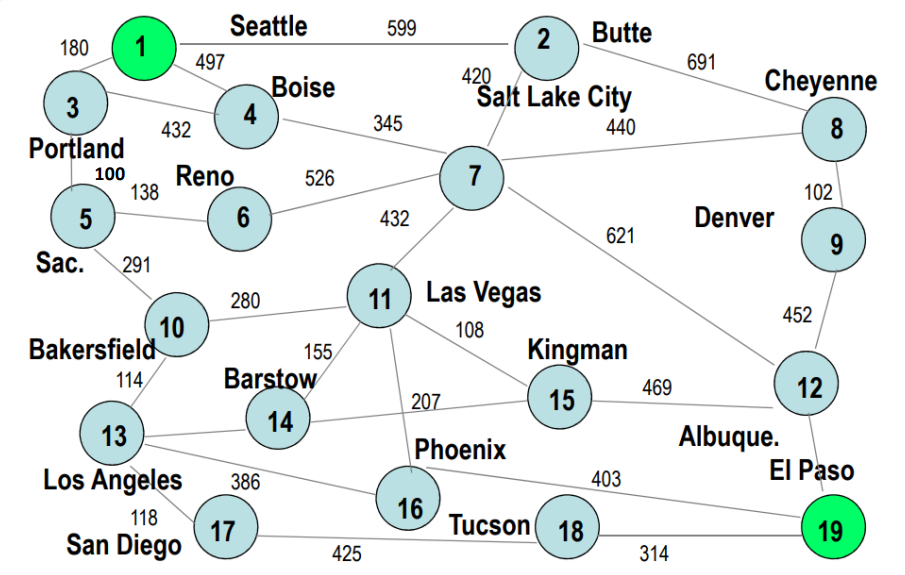

In [29]:
# Importar la librería de Google OR-Tools
from __future__ import print_function
from ortools.graph import pywrapgraph

In [37]:
nodos_fuente  = [ 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7]
nodos_destino = [ 2, 3, 4, 1, 3, 5, 1, 2, 4, 5, 1, 3, 5, 3, 4, 2, 5, 4, 3, 4, 5, 6]
capacidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distancia     = [ 2, 1, 4, 2, 6, 3, 1, 6, 3, 8, 4, 3, 7, 8, 7, 3, 9, 10, 9, 10, 2, 6] 

suministros = [1, 0, 0, 0, 0, 0, -1]


nodos_fuente  = [ 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6]
nodos_destino = [ 1, 2, 3, 0, 2, 4, 0, 1, 3, 4, 5, 0, 2, 4, 5, 6, 1, 2, 3, 5, 6, 2, 3, 4, 6, 3, 4, 5]
capacidades   = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
distancia     = [ 2, 1, 4, 2, 6, 3, 1, 6, 3, 8, 6, 4, 3, 7,10,10, 3, 8, 7, 9, 2, 6,10, 9, 6,10, 2, 6]

suministros = [1, 0, 0, 0, 0, 0, -1]

In [42]:

nodos_fuente  = [   0,   0,   0,   1,   1,   1,   2,   2,   2,   3,   3,   3,   4,   4,   4,   5,   5,   6,   6,   6,   6,   6,   6,   7,   7,   7,   8,   8,   9,   9,   9,  10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18]
nodos_destino = [   1,   2,   3,   0,   6,   7,   0,   3,   4,   0,   2,   6,   2,   5,   9,   4,   6,   1,   3,   5,   7,  10,  11,   1,   6,   8,   7,  11,   4,  10,  12,   6,  9, 13, 14, 15,  6,  8, 14, 18,  9, 13, 15, 16, 10, 12, 14, 10, 11, 13, 10, 12, 18, 12, 17, 16, 18, 11, 15, 17]
capacidades   = [   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]
distancia     = [ 599, 180, 497, 599, 420, 691, 180, 432, 100, 497, 432, 345, 100, 138, 291, 138, 526, 420, 345, 526, 440, 432, 621, 691, 440, 102, 102, 452, 291, 280, 114, 432,280,155,100,108,621,452,469,100,114,100,386,118,155,100,207,108,469,207,100,386,403,118,425,425,314,100,403,314]
suministros   = [   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, -1]

In [43]:
# Crea una instancia para el solucionador
min_cost_flow = pywrapgraph.SimpleMinCostFlow()

# Define cada arco del problema
for i in range(0, len(nodos_fuente)):
  min_cost_flow.AddArcWithCapacityAndUnitCost(nodos_fuente[i], nodos_destino[i],
                                              capacidades[i], distancia[i])

# Define los suministros para cada nodo.
for i in range(0, len(suministros)):
  min_cost_flow.SetNodeSupply(i, suministros[i])

In [44]:

# Encuentra el costo mínimo entre el nodo 0 y el nodo 8
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
  print('Distancia mínima:', min_cost_flow.OptimalCost())
  print('')
  print(' Arco Flujo / Capacidad Distancia')
  for i in range(min_cost_flow.NumArcs()):
    cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
    print('%1s -> %1s %3s / %3s %3s' % (
        min_cost_flow.Tail(i),
        min_cost_flow.Head(i),
        min_cost_flow.Flow(i),
        min_cost_flow.Capacity(i),
        cost))
else:
  print('Hubo un problema con la entrada de flujo de distancia mínima.')

Distancia mínima: 1362

 Arco Flujo / Capacidad Distancia
0 -> 1   0 /   1   0
0 -> 2   1 /   1 180
0 -> 3   0 /   1   0
1 -> 0   0 /   1   0
1 -> 6   0 /   1   0
1 -> 7   0 /   1   0
2 -> 0   0 /   1   0
2 -> 3   0 /   1   0
2 -> 4   1 /   1 100
3 -> 0   0 /   1   0
3 -> 2   0 /   1   0
3 -> 6   0 /   1   0
4 -> 2   0 /   1   0
4 -> 5   0 /   1   0
4 -> 9   1 /   1 291
5 -> 4   0 /   1   0
5 -> 6   0 /   1   0
6 -> 1   0 /   1   0
6 -> 3   0 /   1   0
6 -> 5   0 /   1   0
6 -> 7   0 /   1   0
6 -> 10   0 /   1   0
6 -> 11   0 /   1   0
7 -> 1   0 /   1   0
7 -> 6   0 /   1   0
7 -> 8   0 /   1   0
8 -> 7   0 /   1   0
8 -> 11   0 /   1   0
9 -> 4   0 /   1   0
9 -> 10   1 /   1 280
9 -> 12   0 /   1   0
10 -> 6   0 /   1   0
10 -> 9   0 /   1   0
10 -> 13   0 /   1   0
10 -> 14   0 /   1   0
10 -> 15   1 /   1 108
11 -> 6   0 /   1   0
11 -> 8   0 /   1   0
11 -> 14   0 /   1   0
11 -> 18   0 /   1   0
12 -> 9   0 /   1   0
12 -> 13   0 /   1   0
12 -> 15   0 /   1   0
12 -> 16   0 / 